Task 4:

 Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands

In [31]:
#Load the Data with Proper Headers
import pandas as pd

# Load the dataset, assuming the first row was incorrectly used as headers
file_path_training = '/content/twitter_training.csv'
column_names = ['id', 'topic', 'sentiment', 'text']  # Adjust as needed based on your data structure
twitter_training_data = pd.read_csv(file_path_training, header=None, names=column_names)

# Display the first few rows to check if the data loaded correctly
twitter_training_data.head()


,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [16]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
import pandas as pd

# Define the path to your CSV file
file_path_training = '/content/twitter_training.csv'

# Define the correct column names
column_names = ['id', 'topic', 'sentiment', 'text']

# Load the CSV without headers and assign column names
twitter_training_data = pd.read_csv(file_path_training, header=None, names=column_names)

# Display the first few rows to verify
print(twitter_training_data.head())


     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [23]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

# Ensure all values in the 'text' column are strings and handle missing values
twitter_training_data['text'] = twitter_training_data['text'].fillna('').astype(str)

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove URLs, mentions, hashtags, and other unnecessary characters
    text = re.sub(r"http\S+|www\S+|https\S+|@\w+|#\w+", '', text, flags=re.MULTILINE)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lower case, remove punctuation and stop words, and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalnum() and word.lower() not in stopwords.words('english')]

    # Join tokens back into a single string
    return " ".join(tokens)


In [26]:
# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
# Apply preprocessing to the 'text' column
twitter_training_data['cleaned_text'] = twitter_training_data['text'].apply(preprocess_text)

# Perform Sentiment Analysis
sid = SentimentIntensityAnalyzer()

In [28]:
def analyze_sentiment(text):
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score

twitter_training_data['sentiment_scores'] = twitter_training_data['cleaned_text'].apply(analyze_sentiment)
twitter_training_data['compound'] = twitter_training_data['sentiment_scores'].apply(lambda x: x['compound'])
twitter_training_data['sentiment_label'] = twitter_training_data['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


<ipython-input-30-ae4ad309d312>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=twitter_training_data, palette='viridis')


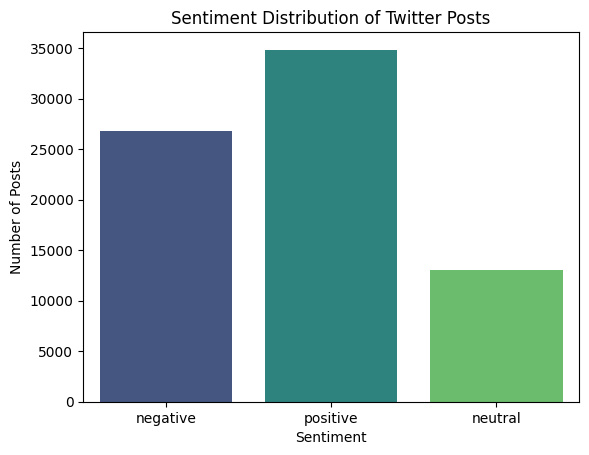

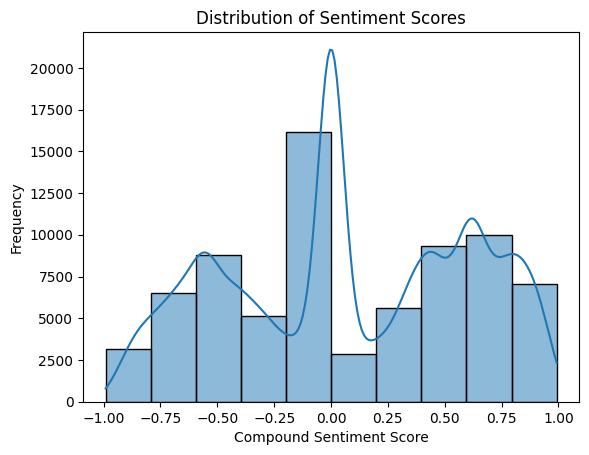

In [30]:
# Visualization
sns.countplot(x='sentiment_label', data=twitter_training_data, palette='viridis')
plt.title('Sentiment Distribution of Twitter Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

sns.histplot(twitter_training_data['compound'], bins=10, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()
